In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


In [72]:
'''
Federal Fund Rate
'''

'\nFederal Fund Rate\n'

In [73]:
df=pd.read_csv('FRB_H15.csv')
df.head()

,Descriptions:,Unit:,Multiplier:,Currency:,Unique Identifier:,Series Name:,1960-01,1960-02,1960-03,1960-04,...,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09
0,Federal funds effective rate,Percent:_Per_Year,1,NaN,H15/H15/RIFSPFF_N.M,RIFSPFF_N.M,3.99,3.97,3.84,3.92,...,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.33,5.13
1,30-Day AA Nonfinancial Commercial Paper Intere...,Percent,1,NaN,H15/H15/RIFSPPNAAD30_N.M,RIFSPPNAAD30_N.M,NaN,NaN,NaN,NaN,...,5.32,5.32,5.31,5.32,5.31,5.32,5.31,5.30,5.29,5.02
2,60-Day AA Nonfinancial Commercial Paper Intere...,Percent,1,NaN,H15/H15/RIFSPPNAAD60_N.M,RIFSPPNAAD60_N.M,NaN,NaN,NaN,NaN,...,5.34,5.30,5.27,5.32,5.32,5.32,5.32,5.30,5.22,5.04
3,90-Day AA Nonfinancial Commercial Paper Intere...,Percent,1,NaN,H15/H15/RIFSPPNAAD90_N.M,RIFSPPNAAD90_N.M,NaN,NaN,NaN,NaN,...,5.36,5.31,ND,5.32,5.34,ND,5.32,5.26,5.12,4.85
4,30-Day AA Financial Commercial Paper Interest ...,Percent,1,NaN,H15/H15/RIFSPPFAAD30_N.M,RIFSPPFAAD30_N.M,NaN,NaN,NaN,NaN,...,5.33,5.31,5.32,5.31,5.33,5.32,5.32,5.32,5.25,5.07


In [74]:
federal_funds_rate = df[df['Descriptions:'] == 'Federal funds effective rate']
federal_funds_melted = pd.melt(federal_funds_rate, 
                                id_vars=['Descriptions:', 'Unit:', 'Multiplier:', 'Currency:', 'Unique Identifier:', 'Series Name:'],
                                var_name='Date', 
                                value_name='Rate')
print(federal_funds_melted.drop(columns=['Unit:','Multiplier:','Currency:','Unique Identifier:','Series Name:','Descriptions:']))
print(federal_funds_melted.info())

        Date  Rate
0    1960-01  3.99
1    1960-02  3.97
2    1960-03  3.84
3    1960-04  3.92
4    1960-05  3.85
..       ...   ...
772  2024-05  5.33
773  2024-06  5.33
774  2024-07  5.33
775  2024-08  5.33
776  2024-09  5.13

[777 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Descriptions:       777 non-null    object 
 1   Unit:               777 non-null    object 
 2   Multiplier:         777 non-null    int64  
 3   Currency:           0 non-null      float64
 4   Unique Identifier:  777 non-null    object 
 5   Series Name:        777 non-null    object 
 6   Date                777 non-null    object 
 7   Rate                777 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 48.7+ KB
None


In [75]:
federal_funds_melted['Date']=pd.to_datetime(federal_funds_melted['Date'])
federal_funds_melted['Rate'] = pd.to_numeric(federal_funds_melted['Rate'], errors='coerce')
federal_funds_melted['Year'] = federal_funds_melted['Date'].dt.year
yearly_data = federal_funds_melted.groupby('Year', as_index=False)['Rate'].mean()
yearly_data

,Year,Rate
0,1960,3.215833
1,1961,1.955000
2,1962,2.708333
3,1963,3.178333
4,1964,3.496667
...,...,...
60,2020,0.375833
61,2021,0.080000
62,2022,1.683333
63,2023,5.024167


In [76]:
'''
CPI
'''

'\nCPI\n'

In [77]:
df_cpi=pd.read_excel('CPI_annual.xlsx')
df_cpi


,Year,Annual
0,1960,1.7
1,1961,1.0
2,1962,1.0
3,1963,1.3
4,1964,1.3
...,...,...
59,2019,1.8
60,2020,1.2
61,2021,4.7
62,2022,8.0


In [78]:
'''
US Treasury 10 Year
'''

'\nUS Treasury 10 Year\n'

In [79]:

ust=pd.read_csv('US10Y.csv')
ust['DGS10'] = pd.to_numeric(ust['DGS10'], errors='coerce')


In [80]:
ust['DATE']=pd.to_datetime(ust['DATE'])
ust['Year']=ust['DATE'].dt.year
ust_yearly=ust.groupby('Year',as_index=False)['DGS10'].mean()
ust_yearly

,Year,DGS10
0,1962,3.946064
1,1963,4.001566
2,1964,4.187360
3,1965,4.283695
4,1966,4.925040
...,...,...
58,2020,0.889203
59,2021,1.446853
60,2022,2.950562
61,2023,3.959000


In [81]:
'''
Unemployment Rate
'''

'\nUnemployment Rate\n'

In [82]:
une=pd.read_csv('UNRATE.csv')
une['DATE']=pd.to_datetime(une['DATE'])
une['Year']=une['DATE'].dt.year
une_yearly=une.groupby('Year',as_index=False)['UNRATE'].mean()
une_yearly

,Year,UNRATE
0,1960,5.541667
1,1961,6.691667
2,1962,5.566667
3,1963,5.641667
4,1964,5.158333
...,...,...
60,2020,8.091667
61,2021,5.350000
62,2022,3.633333
63,2023,3.625000


In [83]:
'''
GDP
'''

'\nGDP\n'

In [84]:
gdp=pd.read_csv('GDP.csv')


In [85]:
gdp['DATE']=pd.to_datetime(gdp['DATE'])
gdp['GDP_PCH']=pd.to_numeric(gdp['GDP_PCH'],errors='coerce')
gdp['year']=gdp['DATE'].dt.year
gdp_yearly=gdp.groupby('year',as_index=False)['GDP_PCH'].mean()
gdp_yearly

,year,GDP_PCH
0,1960,3.97351
1,1961,3.65563
2,1962,7.41925
3,1963,5.55205
4,1964,7.37468
...,...,...
60,2020,-0.86294
61,2021,10.89751
62,2022,9.82097
63,2023,6.58986


In [86]:
'''
Visualization
'''

'\nVisualization\n'

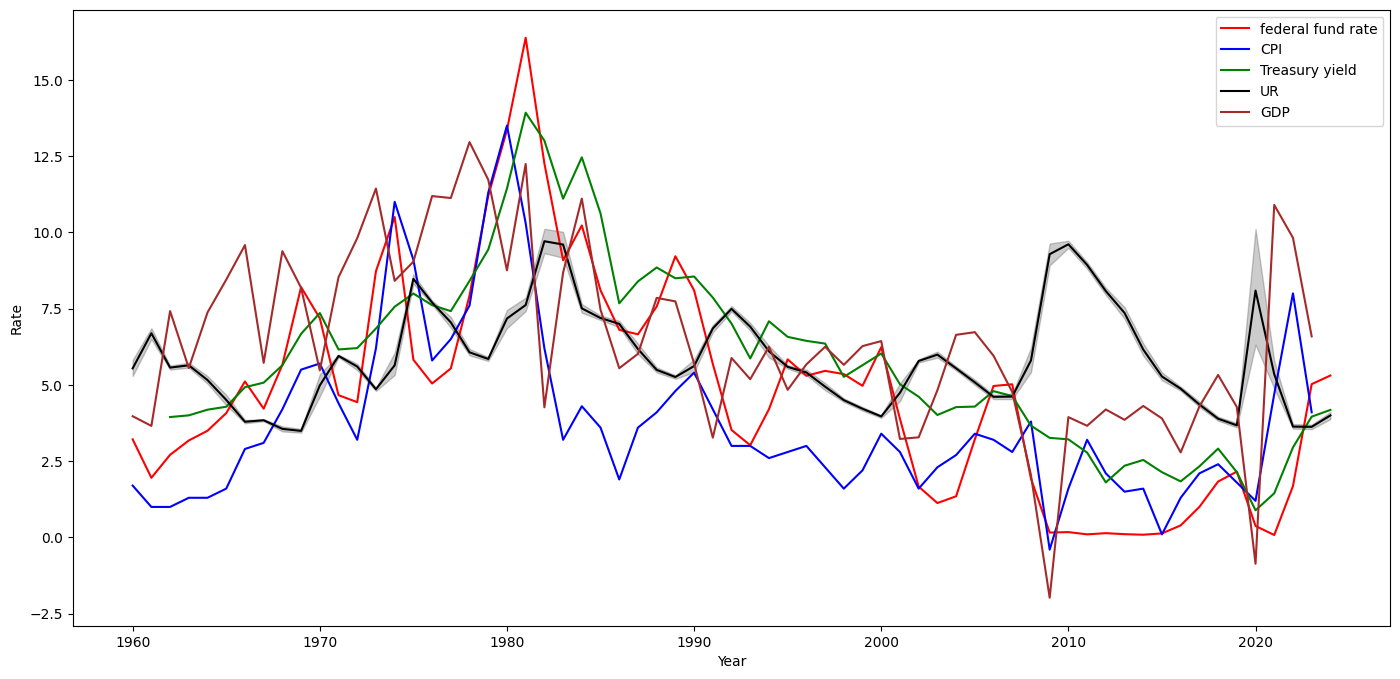

In [87]:
plt.figure(figsize=(17,8))
sns.lineplot(data=yearly_data,x='Year',y='Rate',label='federal fund rate',color='red')
sns.lineplot(data=df_cpi,x='Year',y='Annual',label='CPI',color='blue')
sns.lineplot(data=ust_yearly,x='Year',y='DGS10',label='Treasury yield',color='green')
sns.lineplot(data=une,x='Year',y='UNRATE',label='UR',color='black')
sns.lineplot(data=gdp,x='year',y='GDP_PCH',label='GDP',color='brown')
plt.legend()
plt.show()

In [88]:

merged_df=pd.concat([yearly_data,une_yearly,ust_yearly,gdp_yearly,df_cpi],axis=1)
merged_df.drop(columns=['Year'],inplace=True)
merged_df.rename(columns={'DGS10':'10-Y Treasury Yield','Annual':'CPI_PCH'},inplace=True)
merged_df.fillna(0,inplace=True)
merged_df


,Rate,UNRATE,10-Y Treasury Yield,year,GDP_PCH,CPI_PCH
0,3.215833,5.541667,3.946064,1960,3.97351,1.7
1,1.955000,6.691667,4.001566,1961,3.65563,1.0
2,2.708333,5.566667,4.187360,1962,7.41925,1.0
3,3.178333,5.641667,4.283695,1963,5.55205,1.3
4,3.496667,5.158333,4.925040,1964,7.37468,1.3
...,...,...,...,...,...,...
60,0.375833,8.091667,2.950562,2020,-0.86294,1.2
61,0.080000,5.350000,3.959000,2021,10.89751,4.7
62,1.683333,3.633333,4.179529,2022,9.82097,8.0
63,5.024167,3.625000,0.000000,2023,6.58986,4.1


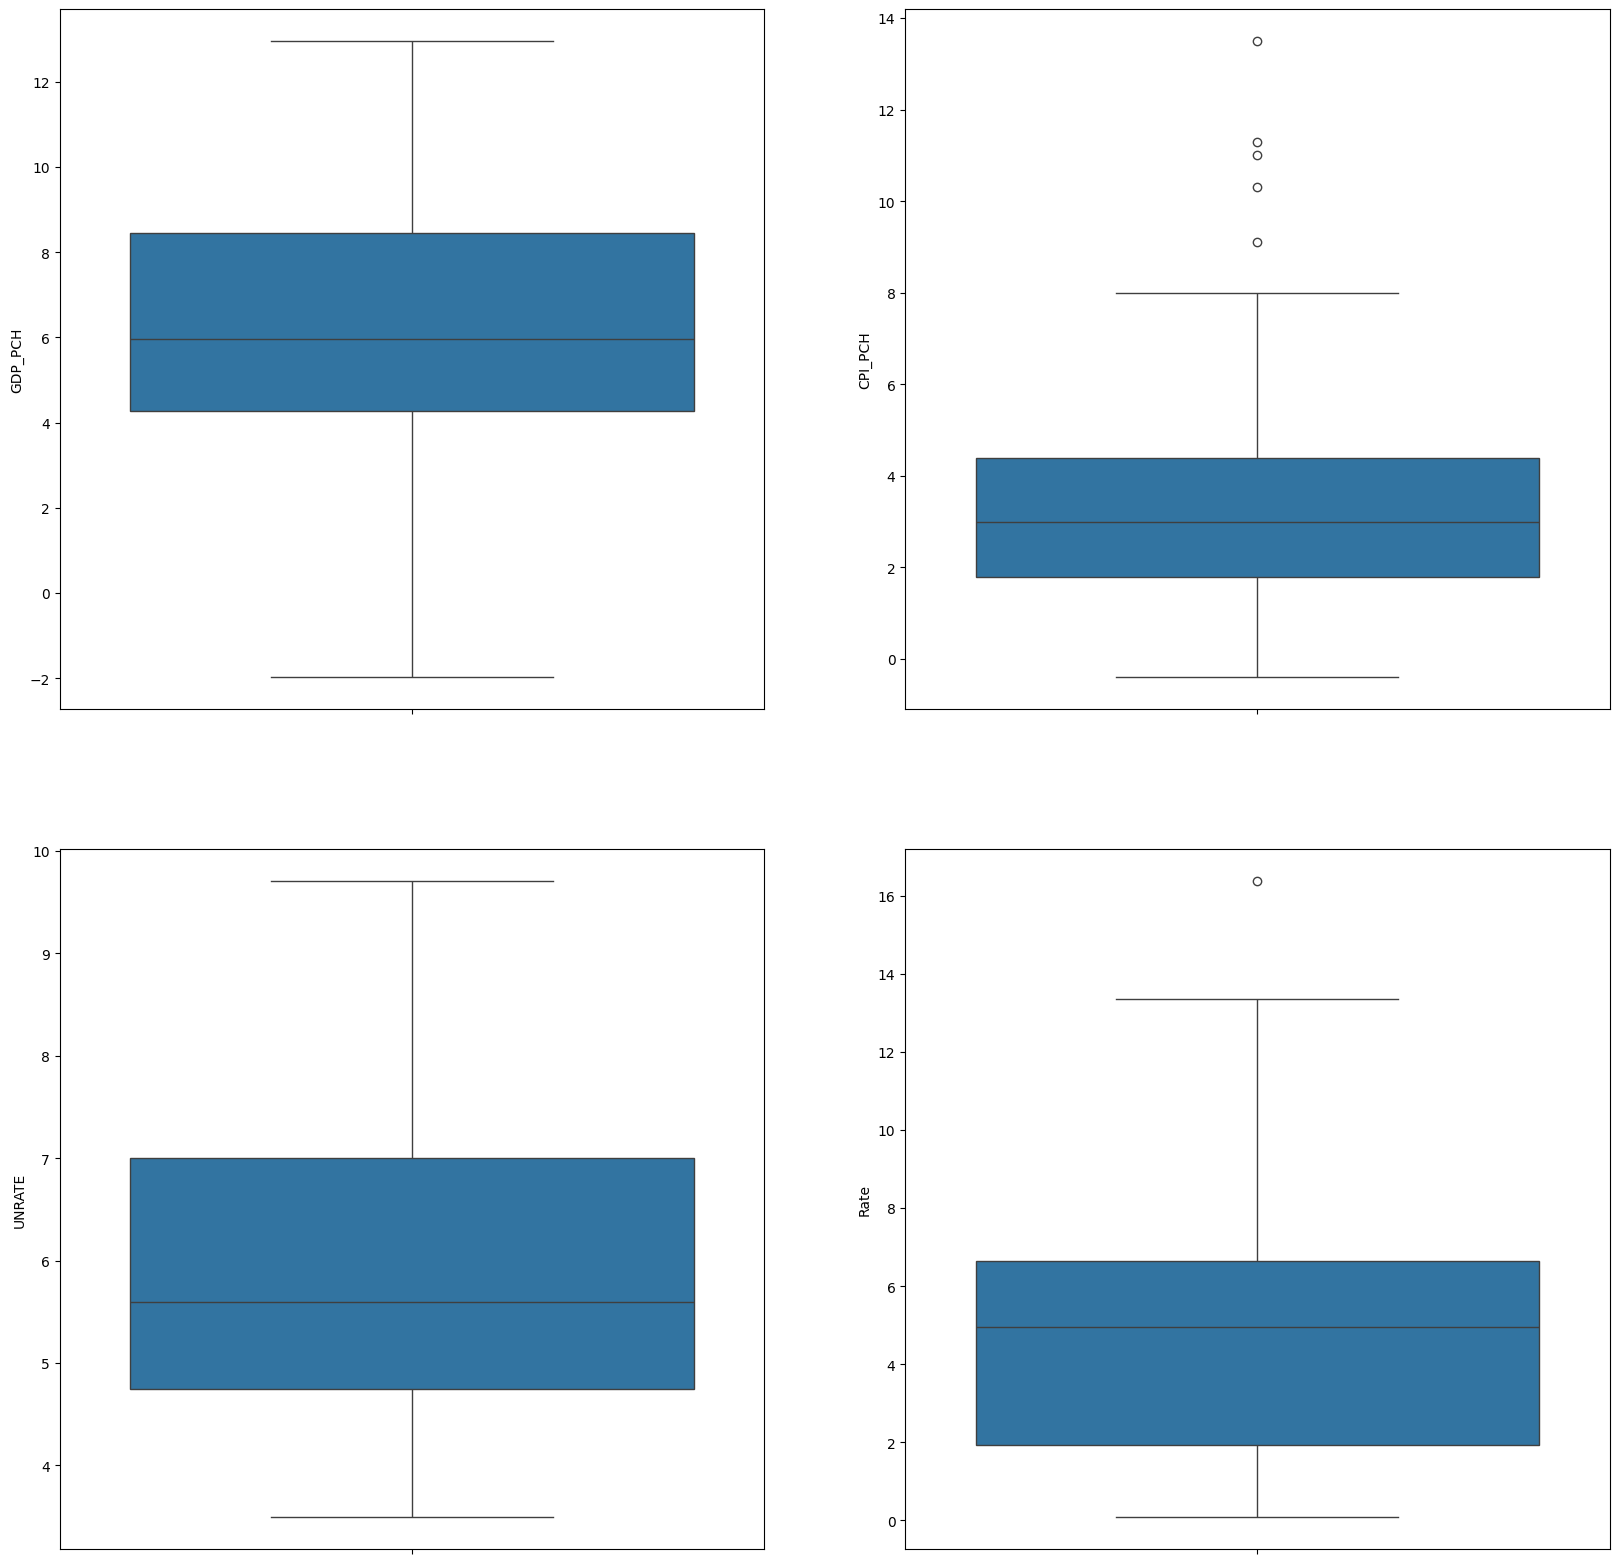

In [89]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
sns.boxplot(data=merged_df,y='GDP_PCH',ax=ax[0][0])
sns.boxplot(data=merged_df,y='CPI_PCH',ax=ax[0][1])
sns.boxplot(data=merged_df,y='UNRATE',ax=ax[1][0])
sns.boxplot(data=merged_df,y='Rate',ax=ax[1][1])
plt.show()

In [90]:
'''
Heatmap
'''

'\nHeatmap\n'

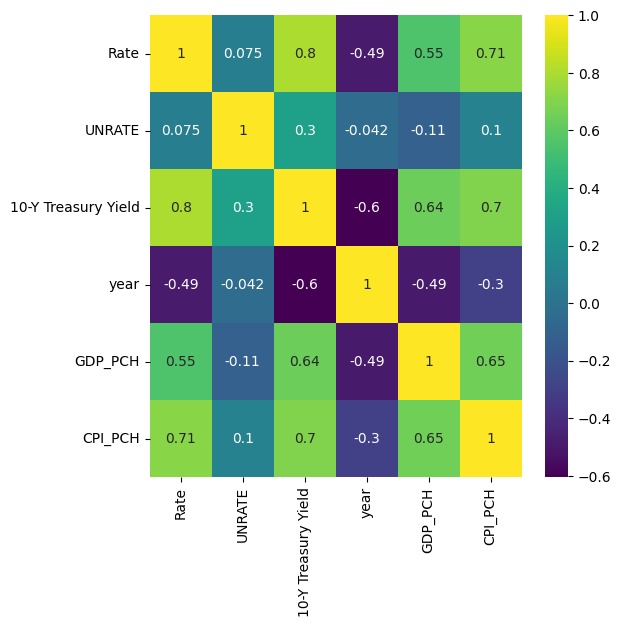

In [91]:
corr_matrix=merged_df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix,annot=True,cmap='viridis')
plt.show()

<Figure size 100x100 with 0 Axes>

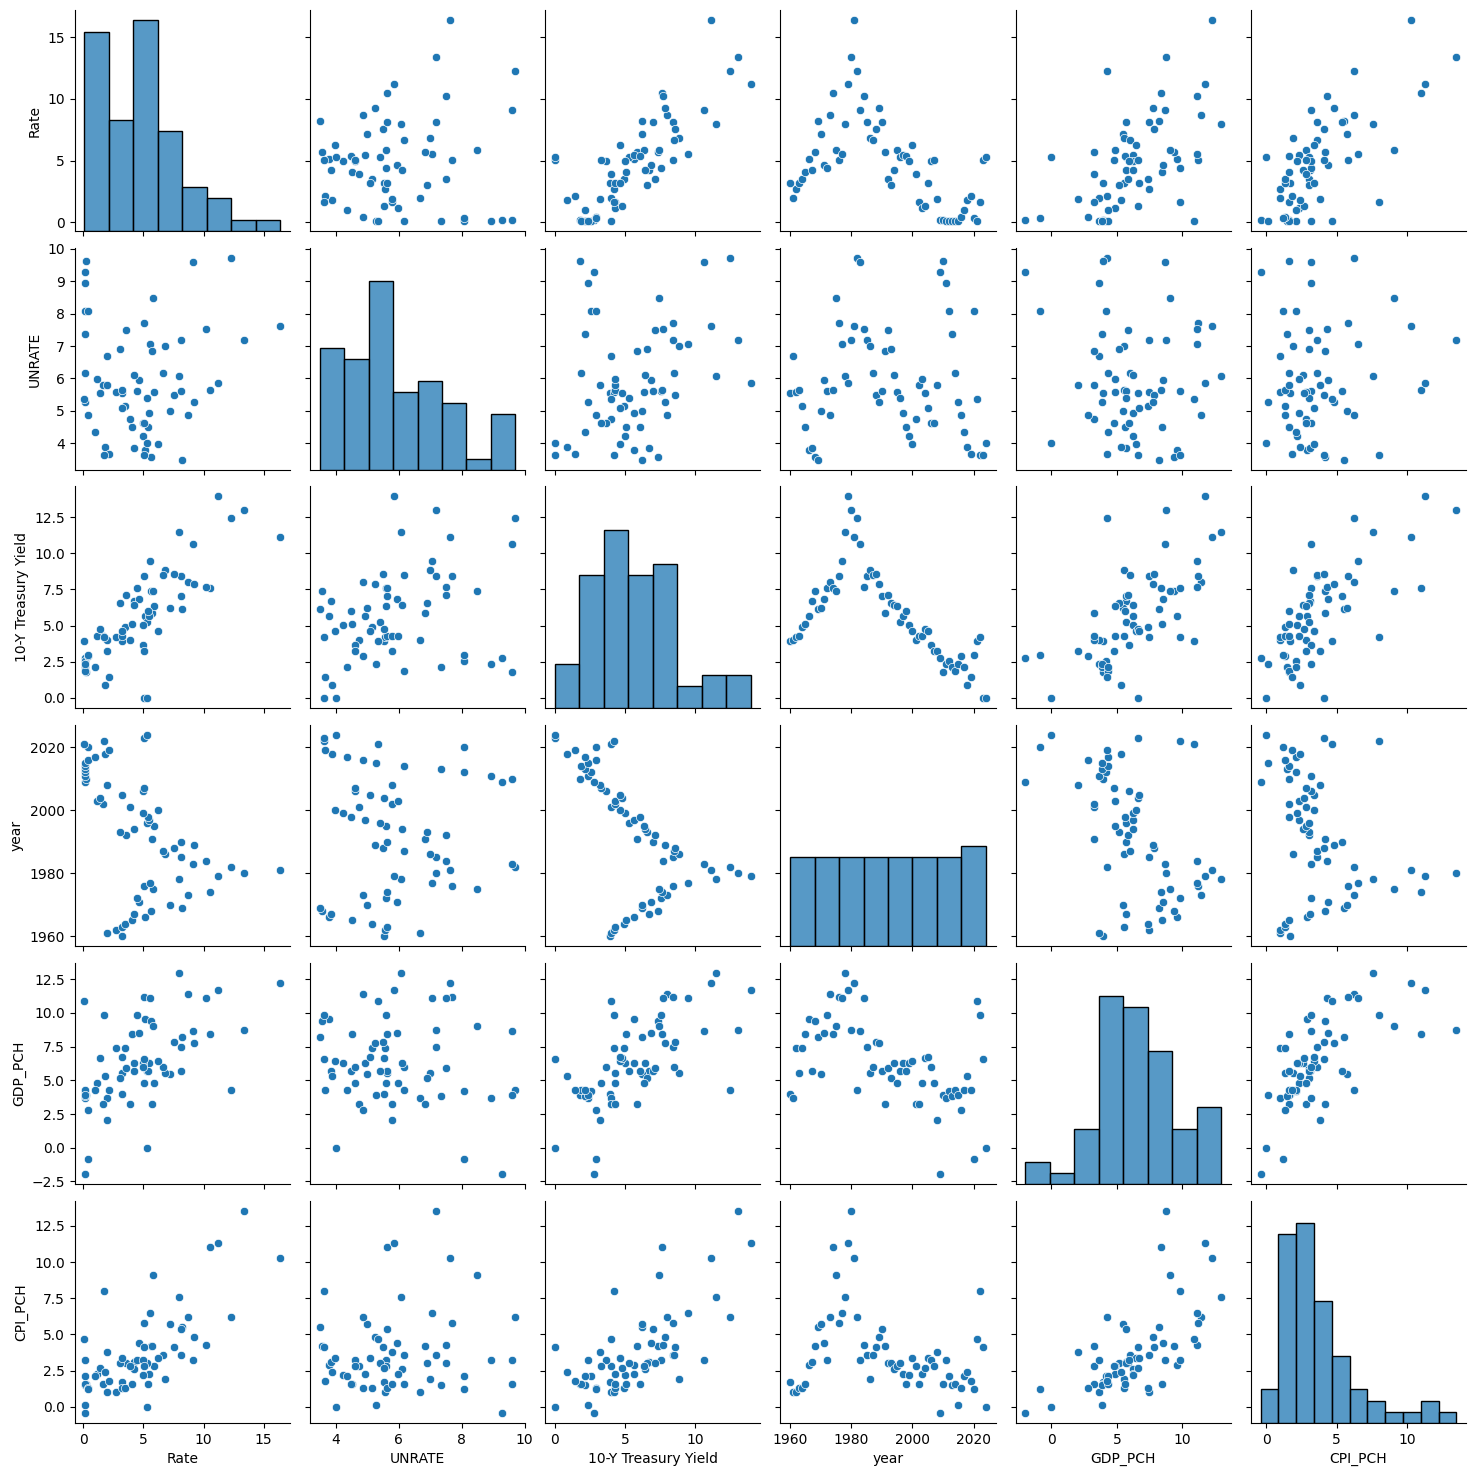

In [92]:
plt.figure(figsize=(1,1))
sns.pairplot(merged_df)
plt.show()

In [93]:

X = merged_df[['10-Y Treasury Yield', 'Rate', 'GDP_PCH']]  
y = merged_df['CPI_PCH']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
}
for model_name, model in regression_models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2= r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.3f}, RMSE: {rmse:.3f}, R² Score: {r2:.3f}")
    accuracy=model.score(X_test,y_test)
    print(f'{model}:{accuracy}')

Linear Regression - MSE: 1.235, RMSE: 1.111, R² Score: 0.609
LinearRegression():0.6090846460696473
Random Forest Regressor - MSE: 1.851, RMSE: 1.361, R² Score: 0.414
RandomForestRegressor():0.4140569935570876
Decision Tree Regressor - MSE: 4.975, RMSE: 2.230, R² Score: -0.575
DecisionTreeRegressor():-0.574599190890021
